# Teeth Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Data

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


In [3]:
train_directory = '/content/drive/MyDrive/Datasets/Teeth_Classification/Teeth_Dataset/Training'

In [4]:
test_directory='/content/drive/MyDrive/Datasets/Teeth_Classification/Teeth_Dataset/Testing'

In [5]:
validation_directory='/content/drive/MyDrive/Datasets/Teeth_Classification/Teeth_Dataset/Validation'

In [6]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 128,
    "LEARNING_RATE": 1e-4,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.05,
    "REGULARIZATION_RATE": 0.001,
    "N_FILTERS": 32,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 2048,
    "N_DENSE_2": 512,
    "NUM_CLASSES": 7,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
}

In [7]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 3087 files belonging to 7 classes.


In [8]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 1028 files belonging to 7 classes.


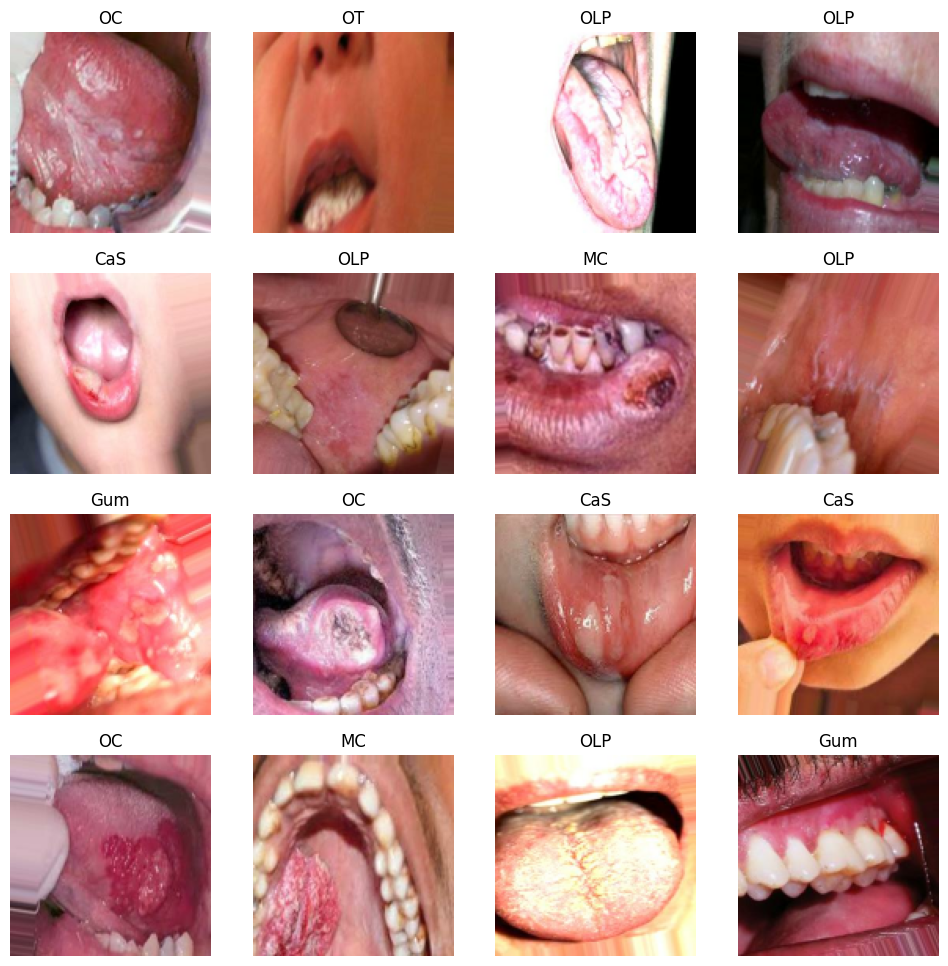

In [9]:
plt.figure(figsize = (12,12))

for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis("off")

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, models

# Define the model as previously done
model = models.Sequential()
model.add(layers.Conv2D(CONFIGURATION['N_FILTERS'], (CONFIGURATION['KERNEL_SIZE'], CONFIGURATION['KERNEL_SIZE']),
                        strides=(CONFIGURATION['N_STRIDES'], CONFIGURATION['N_STRIDES']),
                        activation='relu', input_shape=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'], 3)))
model.add(layers.MaxPooling2D((CONFIGURATION['POOL_SIZE'], CONFIGURATION['POOL_SIZE'])))

model.add(layers.Conv2D(CONFIGURATION['N_FILTERS']*2, (CONFIGURATION['KERNEL_SIZE'], CONFIGURATION['KERNEL_SIZE']), activation='relu'))
model.add(layers.MaxPooling2D((CONFIGURATION['POOL_SIZE'], CONFIGURATION['POOL_SIZE'])))

model.add(layers.Conv2D(CONFIGURATION['N_FILTERS']*4, (CONFIGURATION['KERNEL_SIZE'], CONFIGURATION['KERNEL_SIZE']), activation='relu'))
model.add(layers.MaxPooling2D((CONFIGURATION['POOL_SIZE'], CONFIGURATION['POOL_SIZE'])))

model.add(layers.Flatten())
model.add(layers.Dense(CONFIGURATION['N_DENSE_1'], activation='relu'))
model.add(layers.Dropout(CONFIGURATION['DROPOUT_RATE']))
model.add(layers.Dense(CONFIGURATION['N_DENSE_2'], activation='relu'))
model.add(layers.Dense(CONFIGURATION['NUM_CLASSES'], activation='softmax'))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with callbacks
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=CONFIGURATION['N_EPOCHS'],
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# Load the best model after training
model.load_weights('best_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.1859 - loss: 57.9823 - val_accuracy: 0.3823 - val_loss: 1.6817
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.4543 - loss: 1.4837 - val_accuracy: 0.4961 - val_loss: 1.3710
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.6878 - loss: 0.8857 - val_accuracy: 0.5496 - val_loss: 1.3221
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.8532 - loss: 0.4580 - val_accuracy: 0.6089 - val_loss: 1.1834
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 270s 3s/step - accuracy: 0.9498 - loss: 0.2007 - val_accuracy: 0.6255 - val_loss: 1.2898
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.9875 - loss: 0.0775 - val_accuracy: 0.6537 - val_loss: 1.3300
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.9881 - loss: 0.0636 - val_accuracy: 0.6595 - val_loss: 1.2899
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 286s 3s/step - accuracy: 0.9873 - loss: 0.0588 - val_accuracy: 0.6440 - 

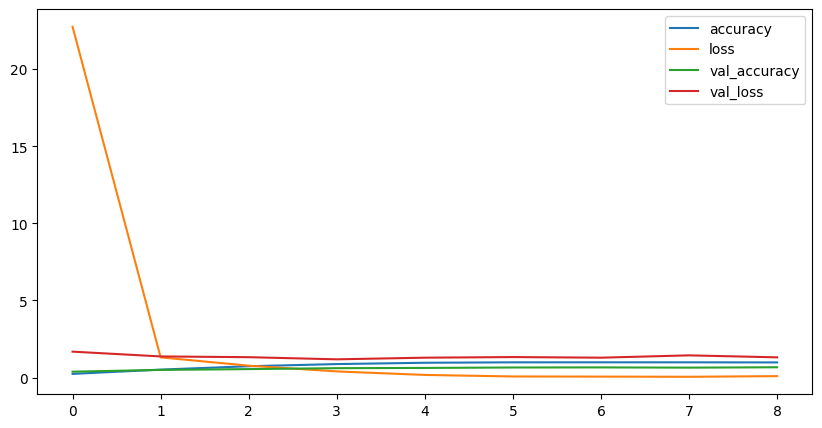

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the history object
loss_acc_metrics_df = pd.DataFrame(history.history)

# Plotting the loss and accuracy
loss_acc_metrics_df.plot(figsize=(10, 5))
plt.show()


In [12]:
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


1028/1028 ━━━━━━━━━━━━━━━━━━━━ 51s 50ms/step - accuracy: 0.5865 - loss: 1.2810
Validation Accuracy: 60.89%
